# Import libs

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data analysis

## Dataframe

In [11]:
df = pd.read_csv('cardio_train.csv')

print(df.shape)
df.head()

(70000, 1)


,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [12]:
features = [x for x in df.keys()]
features = features[0].split(';')
print(f'Features:', len(features))
print('-'*15)
for c in range(len(features)):
    print(f'{c+1}. {features[c]}')
print('-'*15)

data = []
for idx in range(df.shape[0]):
    values = df.iloc[idx,0].split(';')
    info = {
        features[0]  : values[0],
        features[1]  : values[1],
        features[2]  : values[2],
        features[3]  : values[3],
        features[4]  : values[4],
        features[5]  : values[5],
        features[6]  : values[6],
        features[7]  : values[7],
        features[8]  : values[8],
        features[9]  : values[9],
        features[10] : values[10],
        features[11] : values[11],
        features[12] : values[12]
    }
    data.append(info)

df = pd.DataFrame(data)

Features: 13
---------------
1. id
2. age
3. gender
4. height
5. weight
6. ap_hi
7. ap_lo
8. cholesterol
9. gluc
10. smoke
11. alco
12. active
13. cardio
---------------


In [21]:
df.head()
df.dropna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [22]:
df['weight'] = df['weight'].astype('float')
df['weight'] = df['weight'].astype('int')

In [23]:
# convert all columns to int, except 'weight'
df.iloc[:,:4] = df.iloc[:,:4].astype('int')
df.iloc[:,5:] = df.iloc[:,5:].astype('int')

In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [25]:
df['age'] = np.floor(df['age'] / 365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,47,1,156,56,100,60,1,1,0,0,0,0


## Graph Visualization

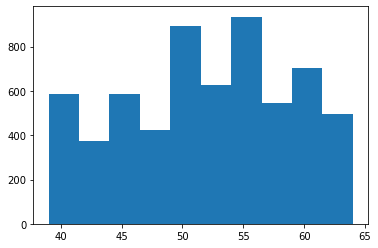

In [41]:
smokers = df[df['smoke'] == 1]
no_smoker = df[df['smoke'] == 0]
#df.plot.bar(smokers,no_smoker)
smokers_age = smokers['age'].values
plt.hist(smokers_age);